In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../analysis/

/srv/data/home/jlee782/segmentation/analysis


In [3]:
%load_ext autoreload
%autoreload 2
from preprocessing import *

/home/jlee782/.local/lib/python2.7/site-packages/pandas/io/parsers.py:648: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skip_footer; you can avoid this warning by specifying engine='python'.
  ParserWarning)


In [4]:
from sklearn import cluster
import sklearn

In [5]:
def compute_jaccard_affinity_matrix(object_id,exclude_lst=[]):
    bb_objects = bb_info[bb_info["object_id"]==object_id]
    worker_lst =  bb_objects.worker_id.unique()
    worker_lst = [w for w in worker_lst if w not in exclude_lst]
    prj_matrix = []
    for idx in worker_lst:
        prj_row =[]
        for jdx in worker_lst:
            #if idx!=jdx :
                worker_BB_polygon = worker_polygon(bb_objects,idx)
                worker_BB_polygon2 = worker_polygon(bb_objects,jdx)
                prj = BB_PRJ(worker_BB_polygon,worker_BB_polygon2)
                prj_row.append(prj[2])
        prj_matrix.append(prj_row)
    prj_matrix = np.array(prj_matrix)
    worker_lst=np.array(worker_lst)
    return prj_matrix,worker_lst

In [6]:
def run_spectral_clustering(obj,N,PLOT=True):
    spectral = cluster.SpectralClustering(
            n_clusters=N, eigen_solver='arpack',
            affinity="precomputed")
    aff_mat,worker_lst = compute_jaccard_affinity_matrix(obj)
    labels = spectral.fit_predict(aff_mat)
    obj_worker_cluster =[]
    if PLOT: 
        bb_objects = bb_info[bb_info["object_id"]==obj]
        plt.figure()
        plt.title("Obj {}".format(obj))
#         colors = ["blue","red","green","magenta","orange"]
#         for i,ylabel in enumerate(list(set(labels))):
        cmap = plt.cm.rainbow
        for i,ylabel in enumerate(list(set(labels))):
            c = cmap(i / float(len(list(set(labels)))))
            workers_in_cluster = np.where(labels==ylabel)[0]
            for widx in workers_in_cluster:
                plot_coords(worker_polygon(bb_objects,worker_lst[widx]),reverse_xy=True,color=c,fill_color="")
        plot_coords(ground_truth_T(obj),color="black",fill_color="",reverse_xy=True,lw=3,linestyle='--',invert_y=True)
    for i,ylabel in enumerate(list(set(labels))):
        workers_in_cluster = np.where(labels==ylabel)[0]
        for widx in workers_in_cluster:
            obj_worker_cluster.append([obj,worker_lst[widx],ylabel])
    return obj_worker_cluster

In [7]:
objN_lst = [(1,2),(4,2),(7,2),(8,3),(10,2),(20,5),(15,2),(18,2),(21,2),(22,3),(25,2),(26,2),(27,4),(28,2),(29,3),(30,2),(31,3),(32,2),(33,2),(34,2),(35,2),(37,2),(40,2),(42,2),(47,3)]

In [8]:
#old # objN_lst = [(1,2),(4,2),(7,2),(8,3),(10,2),(20,4),(15,2),(18,3),(20,4),(21,3),(22,4),(25,2),(26,2),(27,4),(28,2),(29,3),(30,2),(31,3),(32,2),(33,2),(34,3),(35,2),(37,2),(40,2),(42,2),(47,2)]

/home/jlee782/.local/lib/python2.7/site-packages/sklearn/manifold/spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/jlee782/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


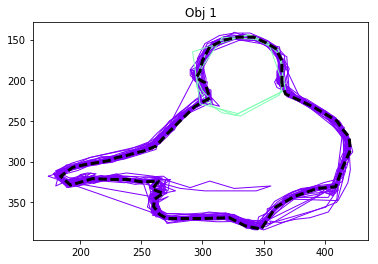

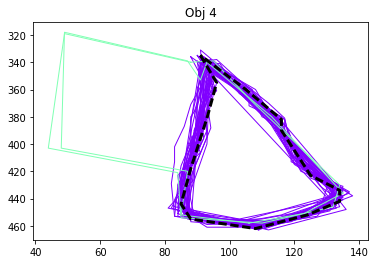

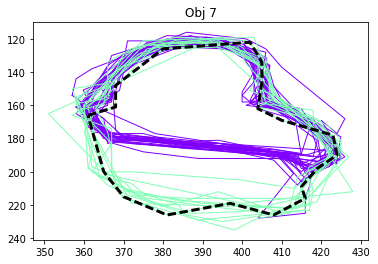

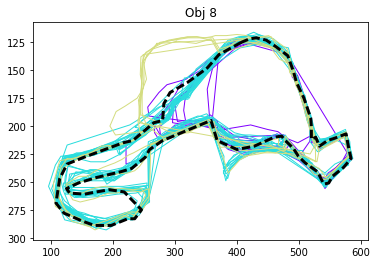

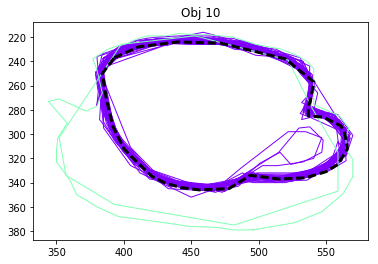

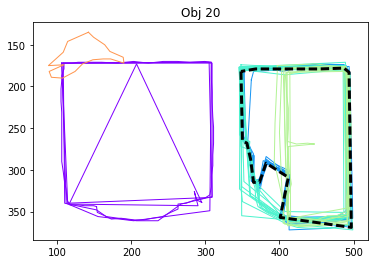

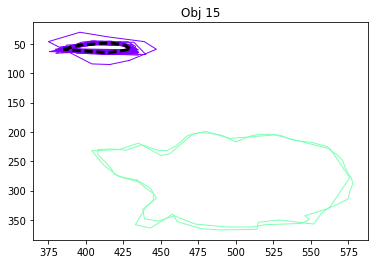

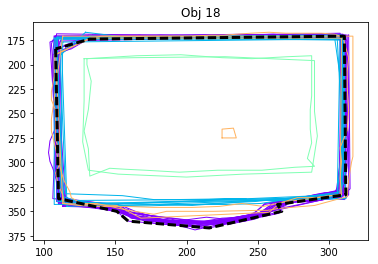

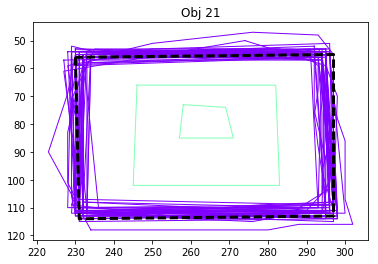

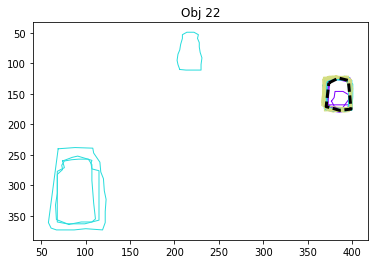

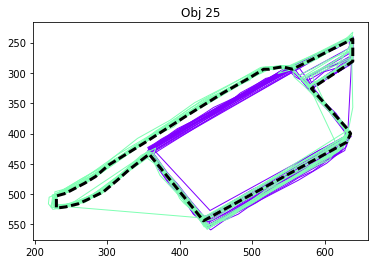

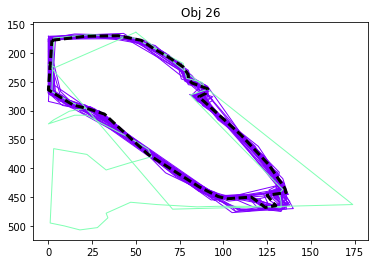

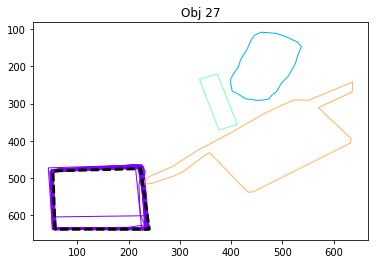

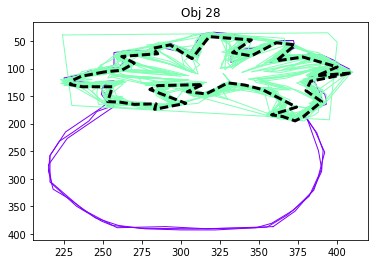

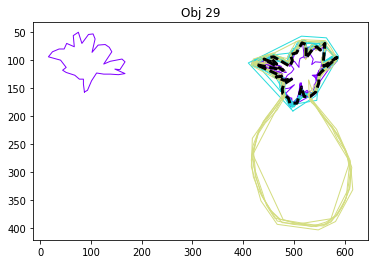

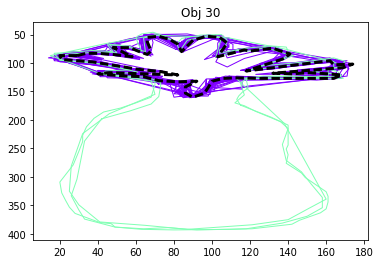

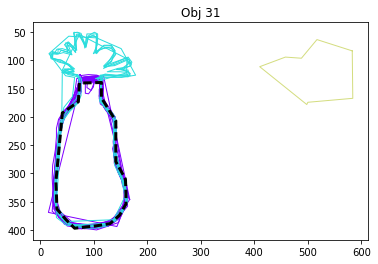

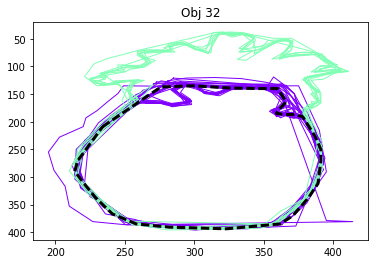

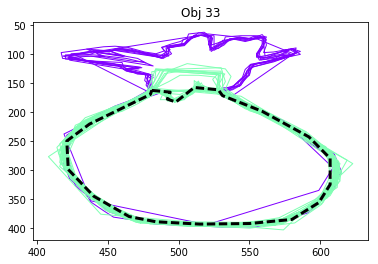

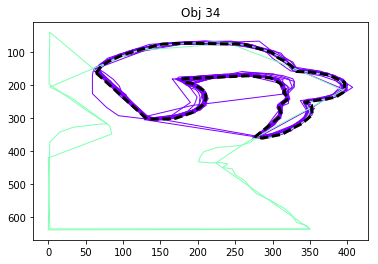

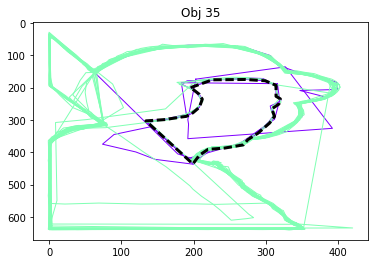

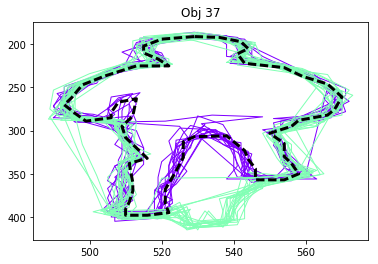

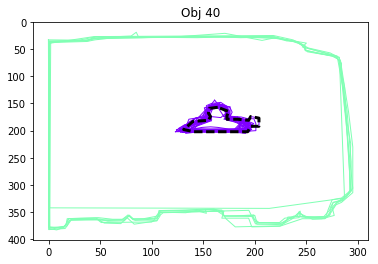

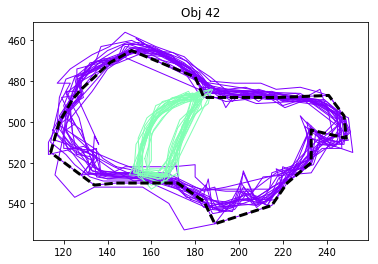

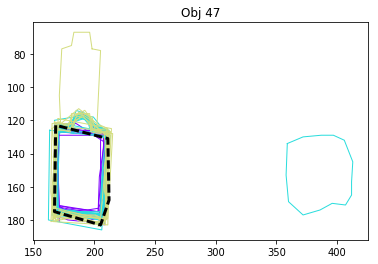

In [9]:
obj_worker_clusters =[]
for objN in objN_lst:
    obj_worker_cluster = run_spectral_clustering(objN[0],objN[1])
    obj_worker_clusters.extend(obj_worker_cluster)

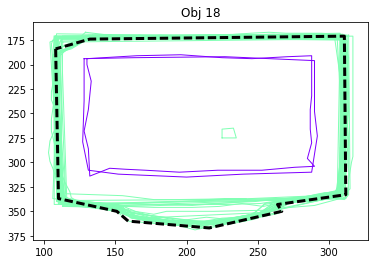

In [16]:
obj_worker_cluster = run_spectral_clustering(18,2)

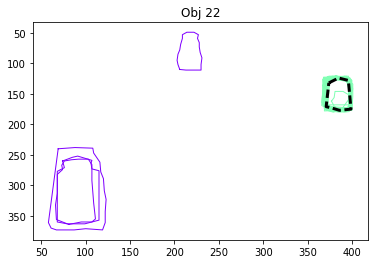

In [11]:
obj_worker_cluster = run_spectral_clustering(22,2)

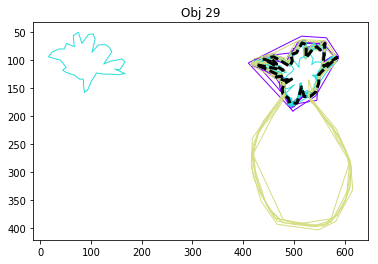

In [19]:
obj_worker_cluster = run_spectral_clustering(29,3)

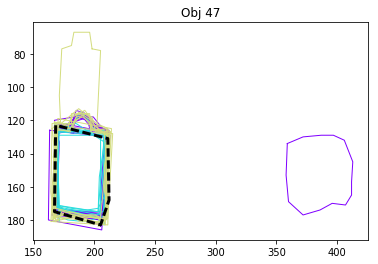

In [13]:
obj_worker_cluster = run_spectral_clustering(47,3)

In [61]:
df = pd.DataFrame(obj_worker_clusters,columns=["objid","wid","cluster"])

In [63]:
df.to_csv("spectral_clustering_all_hard_obj.csv",index=None)